<a href="https://colab.research.google.com/github/SarahAMLima/PDI-w-Python/blob/main/PygeoM2_Sarah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PT - Dados espaciais e projeções com a biblioteca Geopandas**
# **EN - Spatial data and projections with geopandas**

**PT** Introdução ao modelo vetorial de dados espaciais da biblioteca Geopandas e aprenderemos como manipular sistemas de coordenadas no Python. A Geopandas usa a biblioteca Shapely como sua base rodando no background.

1. Conectando o Colab com o seu Google drive
2. Lendo shapefiles com a Geopandas
3. Seleção de geometrias por atributo 
4. Introdução à geometrias com a geopandas
5. Criando geometrias com a geopandas
6. Manipulando sistemas de coordenadas 
7. Diferentes formatos de sistemas de coordenadas
8. Automatizando a exportação de shapefiles
9. Automatizando a reprojeção de vetores

**EN**
Introduction to vetorial model of spatial data from the library geopandas and learn how to manipulate coordinate systems in Python.
Geopandas uses shapely in the background for data manipulation.

1. How to connect Google Colab (notebook for coding) with Google drive (where de data is stored)
2. Read shapefiles with geopandas
3. Select geometries by attributes
4. Introduction to geometries with geopandas
5. Creating geometries with geopandas
6. Manipulating coordinate systems
7. Different formats of coordinate systems
8. Automatizing shapefiles exportation
9. Automatizing vectores reprojections 

**PT** Objetivo: aprender a ler e escrever dados no formato Shapefile, criar e inserir geometrias em um GeoDataFrame, e reprojetar geometrias.

**EN** Goal: to learn how to read and write data as shapefile, to create and insert geometries into a GeoDataFrame and, to reproject these geometries. 

-----------------------------------INTRO--------------------------------------

**PT** Tipos de sistemas de coordenadas:
1. métrico: define a localização usando sistemas de coordenadas e medidas de distância a partir da origem do sistema. 

2. geográfico: descrição 3D da localização: longitude, latitude, altitude.

3. projetado: projeta a localização da superfície 3D terrestre para uma superfície 2D: Easting(x), Northing(Y). 

## **1. Conectando o Colab com o google drive**

In [ ]:
#Aqui montamos o acesso ao nossos google drive, assim podemos salvar e acessar dados diretamente de lá. 
from google.colab import drive
 #montando o acesso ao drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# **2. Lendo shapefiles com pandas**

Dados espaciais podem ser facilmente lidos com a Geopandas utilizando a função [geopandas.read_file()](https://geopandas.org/en/stable/docs/user_guide/io.html#reading-spatial-data). A geopandas pode ler quase qualquer formato de dados espaciais baseado em vetor, incluindo ESRI shapefile, GeoJSON e geopackages. Isso é possível porque a geopandas faz uso da biblioteca [fiona](https://pypi.org/project/Fiona/), que por sua vez faz uso de um enorme programa de código aberto chamado [GDAL/OGR](https://gdal.org/index.html). O GDAL/OGR que foi desenvolvido para facilitar as transformações de dados espaciais e também é utilizado pelo QGIS. 

In [ ]:
#Primeiro vamos instalar a Geopandas. O argumento -q quer dizer quiet (silencioso) e ele é utilizado quando não precisamos que os detalhes da instalação sejam mostrados.
!pip install geopandas -q  #esse é o formato para instalar qualquer biblioteca no google colab.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 72.6 MB/s eta 0:00:00


In [ ]:
#Importe a biblioteca Geopandas como gpd(apelido pelo qual chamaremos a biblioteca no script)
import geopandas as gpd

#Indico o caminho do shapefile que vamos ler. Esse deve ser o caminho dele no seu google drive.
shapefile='/content/drive/MyDrive/Python/PyGEO/Modulo 2/M2-Dados/M2/dis_sampa_23s.shx'

#Lendo o shapefile
dis_sampa=gpd.read_file(shapefile)

#Verifique o tipo de variável em que lemos o shapefile
type(dis_sampa)

geopandas.geodataframe.GeoDataFrame

Podemos ver que nossa variável dis_sampa é um GeoDataFrame. O GeoDataFrame estende as funcionalidades do pandas.DataFrame de forma que é possível usar e manipular dados espaciais dentro da biblioteca pandas (por isso o nome geopandas). GeoDataFrames tem alguns recursos e funções especiais que são úteis em GIS.

In [ ]:
#Cheque os primeiros registros do nosso geodataframe

dis_sampa.head()

,ds_codigo,ds_nome,sp_codigo,sp_nome,area_km2,geometry
0,51,MANDAQUI,05,SANTANA-TUCURUVI,13.246426,"POLYGON ((330995.449 7407882.882, 330997.253 7..."
1,52,MARSILAC,20,PARELHEIROS,208.184737,"POLYGON ((336169.148 7355348.052, 336166.813 7..."
2,32,MOEMA,12,VILA MARIANA,9.078676,"POLYGON ((331287.247 7392208.050, 331289.654 7..."
3,57,PARQUE DO CARMO,27,ITAQUERA,15.451409,"POLYGON ((352642.665 7390165.168, 352633.278 7..."
4,60,PERDIZES,08,LAPA,6.337240,"POLYGON ((330226.820 7396102.561, 330220.609 7..."


Podemos usar a função .plot() para explorar os dados em um mapa simples criado pela geopandas. Essa função usa a matplotlib no background.

<Axes: >

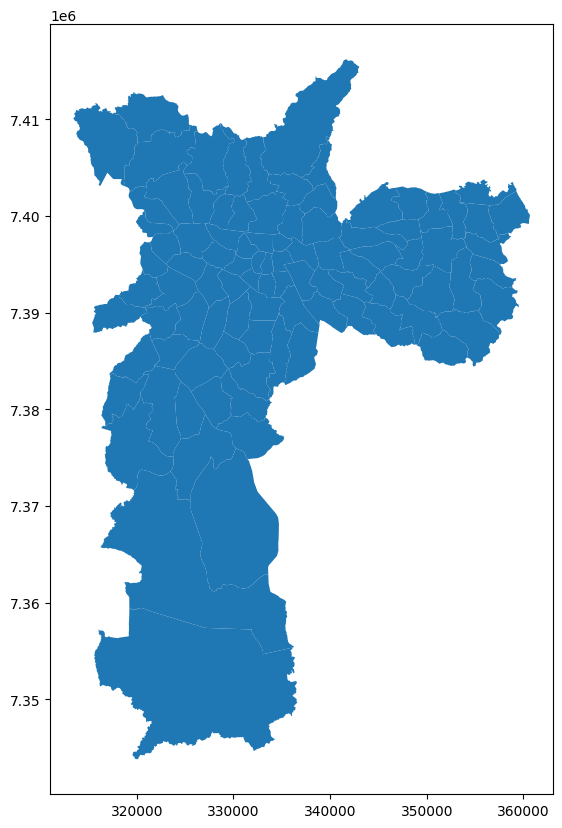

In [ ]:
#Vamos visualizar rapidamente os dados
#Importe a biblioteca matplotlib.pyplot como plt
import matplotlib.pyplot as plt

#Crie a figura e os eixos para plotagem. Defina o tamanho da figura como 10x10 polegadas.
fig,ax=plt.subplots(figsize=(10,10)) #ax é uma variável que está sendo criada. 

#Plote o geodataframe no eixo ax que criamos na linha acima. 
dis_sampa.plot(ax=ax) #o primeiro ax é o eixo de plotagem como o python chama mesmo, automático, o segundo ax é a variável ax que criamos na linha anterior. 

O que estamos vendo é a cidade de São Paulo e seus distritos plotados. Mas na lateral está em nomenclatura científica e eu queria rotacionar a imagem, isso será feito usando o eixo de plotagem, ou seja, o ax. 

Agora vamos customizar os eixos de coordenadas e plotar novamente o shapefile. 

(array([7340000., 7350000., 7360000., 7370000., 7380000., 7390000.,
        7400000., 7410000., 7420000.]),
 [Text(0, 7340000.0, '7340000'),
  Text(0, 7350000.0, '7350000'),
  Text(0, 7360000.0, '7360000'),
  Text(0, 7370000.0, '7370000'),
  Text(0, 7380000.0, '7380000'),
  Text(0, 7390000.0, '7390000'),
  Text(0, 7400000.0, '7400000'),
  Text(0, 7410000.0, '7410000'),
  Text(0, 7420000.0, '7420000')])

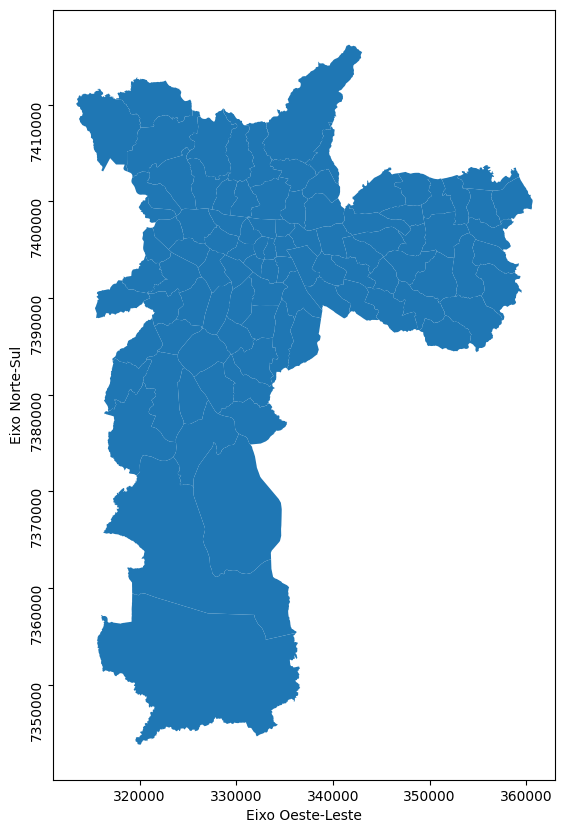

In [ ]:
#Crie a figura e os eixos para plotagem. Defina o tamanho da figura como 10x10 polegadas. 
fig,ax = plt.subplots(figsize=(10,10))

#Plote o geodataframe no eixo ax que criamos na linha acima.
dis_sampa.plot(ax=ax)

#Agora vamos noemar os eixos x e y
ax.set_ylabel("Eixo Norte-Sul")
ax.set_xlabel("Eixo Oeste-Leste")

#Remova a notação científica
ax.ticklabel_format(style="plain")

#Rotacione 
plt.yticks(rotation=90)

# **M2.2. SELEÇÃO POR ATRIBUTO E NOVOS ATRIBUTOS**

Sumário:
1. Atributos disponíveis no GeoDataFrame
-verificando linhas e colunas da tabela
-ex. escolher um distrito da coluna ds_nome
2. Seleção de atributo
-cria uma variável para armazenar o distrito escolhido
-para criar um geodataframe usamos [ ]
**moema=dis_sampa[dis_sampa.ds_nome=='MOEMA'**, onde:

-moema = nome da variável

-dis_sampa= geodataframe completo de são paulo (tabela original)

-ds_nome = nome da coluna que contém o atributo de seleção

== é o símbolo de equivalência/ igualdade - leia 'onde'

-MOEMA = atributo escolhido

Leia **moema=dis_sampa[dis_sampa.ds_nome=='MOEMA'**, da seguinte maneira: 
- estamos criando uma nova variável 'moema' que terá os dados do geodataframe 'dis_sampa', 'onde' a coluna 'ds_nome do geodataframe' 'dis_sampa' for **igual** à 'MOEMA'. 

3. Salvar o GeoDataFrame para novo Shapefile
- primeira coisa é indicar o caminho para salvar o dataframe em uma nova variável, no caso 'out'
- o caminho basta copiar o 'path' do arquivo que está no seu googledrive. 
out="path/NOMEDOARQUIVO.shp", onde shp é shape

4. Exportar GeoDataFrame como Shapefile
**moema.to_file(out)**, onde: 
- moema é a variável criada antes
- out é a variável do caminho de saída
- '.to' é a função que exporta a variável moema pro caminho que está contido na variável out. 

5. Introdução a Geometrias na Geopandas.
Como a geopandas usa as geometrias e a maneira como elas são salvas. 

6. Verificar os Registos das Primeiras Geometrias
7. Recurso .iterrows
8. Calcular Área das Geometrias
9. Criar Novo Atributo para Armazenar Área de cada Polígono em Km2
10. Calcular valor médio e máximo de área
11. Conclusão

In [ ]:
#Primeiro vamos ver quais atributos possuímos nesse geodataframe
dis_sampa.head(3) #mostra as 3 primeiras linhas

,ds_codigo,ds_nome,sp_codigo,sp_nome,area_km2,geometry
0,51,MANDAQUI,05,SANTANA-TUCURUVI,13.246426,"POLYGON ((330995.449 7407882.882, 330997.253 7..."
1,52,MARSILAC,20,PARELHEIROS,208.184737,"POLYGON ((336169.148 7355348.052, 336166.813 7..."
2,32,MOEMA,12,VILA MARIANA,9.078676,"POLYGON ((331287.247 7392208.050, 331289.654 7..."


In [ ]:
#Como criar uma seleção por atributo. 

#Neste exemplo iremos selecionar Madaqui. 

#Pimeiramente vamos criar uma variável chamada mandaqui, juntamente com dis_sampa que será o GeoDataFrame.

#DICA: Interprete as chaves [] como "onde".

#A igualdade comparativa é representada por "==" no Python

mandaqui=dis_sampa[dis_sampa.ds_nome=='MANDAQUI'] #ds_nome é a coluna da tabela que contêm os nomes das localidades
mandaqui #vai mostrar a variável



,ds_codigo,ds_nome,sp_codigo,sp_nome,area_km2,geometry
0,51,MANDAQUI,05,SANTANA-TUCURUVI,13.246426,"POLYGON ((330995.449 7407882.882, 330997.253 7..."


<Axes: >

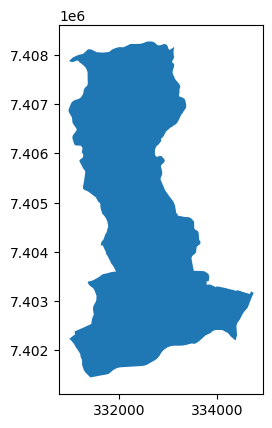

In [ ]:
#Para salvar como shapefile os dados selecionados é necessário indicar o caminho. Para isso vamos usar uma variável
#chamada out. Nela, armazenaremos o caminho da pasta em que vamos salvar a geometria selecionada.
#Ao final do caminho informe o nome do arquivo, neste exemplo definimos mandaqui.shp

out='/content/drive/MyDrive/Python/PyGEO/Modulo 2/Sarah/mandaqui.shp'
mandaqui.to_file(out)

#para plotar e visualizar a geometria selecionada e exportada utilize mandaqui.plot()
mandaqui.plot()

**Introdução a geometrias na geopandas**

In [ ]:
#Vamos checar os registros das primeiras geometrias do nosso dataframe
dis_sampa["geometry"].head()
#dessa forma conseguimos acessar somente a coluna de geometria ao invés de todas as colunas do detaframe

0    POLYGON ((330995.449 7407882.882, 330997.253 7...
1    POLYGON ((336169.148 7355348.052, 336166.813 7...
2    POLYGON ((331287.247 7392208.050, 331289.654 7...
3    POLYGON ((352642.665 7390165.168, 352633.278 7...
4    POLYGON ((330226.820 7396102.561, 330220.609 7...
Name: geometry, dtype: geometry

In [ ]:
#dessa forma também podemos iterar sobre as geometrias, iterar significa repetição e na matemática é
#repetir uma função até que uma condição seja atingida. 
#Para iterar basta usar o recurso iterrows(). Que nada mais é do que fazer um loop

#Agora vamos calcular e mostrar na tela as áreas das 5 primeiras geometrias. 
for index, row in dis_sampa[0:5].iterrows(): #0:5 - da linha zero à linha 5, se quisesse todas era só apagar isso. 
  #Calculando a área da geometroa e armazenando em uma variável
  plg_area=row["geometry"].area #estamos acessando a coluna "geometry" da linha que o iterrow está acessando
  #mostrando na tela a área calculada e o nome de cada distrito
  print('A área de {0} é : {1: .2f}'. format (row['ds_nome'], plg_area))
    #{0} está alocando espaço, o primeiro item do 'row['ds_nome']'que temos irá substituir o zero dentro dos parênteses. 
    #{1: .2f} o no.1 será substituído pelo segundo no. de 'row['ds_nome']', e será um númro francionário ('f') com duas casas depois da vírgula, que no sistema americano é ponto e não vírgula. 


A área de MANDAQUI é :  13246425.63
A área de MARSILAC é :  208184736.92
A área de MOEMA é :  9078676.33
A área de PARQUE DO CARMO é :  15451408.61
A área de PERDIZES é :  6337239.72


In [ ]:
#Vamos criar um novo atributo que armazena a área de cada polígono em km*2
dis_sampa['area_km2']=dis_sampa.area/1000000 #essa função vai calcular a área para cada uma das linhas/geometrias
#que temos, só que em m*2 então precisamos dividir

#Mostrar na tela o topo da tabela no geodataframe
dis_sampa.head()

,ds_codigo,ds_nome,sp_codigo,sp_nome,area_km2,geometry
0,51,MANDAQUI,05,SANTANA-TUCURUVI,13.246426,"POLYGON ((330995.449 7407882.882, 330997.253 7..."
1,52,MARSILAC,20,PARELHEIROS,208.184737,"POLYGON ((336169.148 7355348.052, 336166.813 7..."
2,32,MOEMA,12,VILA MARIANA,9.078676,"POLYGON ((331287.247 7392208.050, 331289.654 7..."
3,57,PARQUE DO CARMO,27,ITAQUERA,15.451409,"POLYGON ((352642.665 7390165.168, 352633.278 7..."
4,60,PERDIZES,08,LAPA,6.337240,"POLYGON ((330226.820 7396102.561, 330220.609 7..."


In [ ]:
#Verificar os primeiros 5 registros da coluna area_km2
dis_sampa['area_km2'].head(5)

0     13.246426
1    208.184737
2      9.078676
3     15.451409
4      6.337240
Name: area_km2, dtype: float64

In [ ]:
#Agora vamos calcular os valores médio e máximo da área
max_area=dis_sampa['area_km2'].max()
mean_area=dis_sampa['area_km2'].mean()
min_area=dis_sampa['area_km2'].min()

#Mostre na tela os valores calculados
print('Área máxima %s \n Área média: %s \n Área mínima: %s'%(round(max_area,2), round(mean_area,2),round(min_area,2)))
#\n é quebra de linha

Área máxima 208.18 
 Área média: 15.91 
 Área mínima: 2.19


## **M2.3. CRIANDO SHAPEFILE DO ZERO**

É possível criar um shapefile do zero passando os objetos geométricos shapely para o geodataframe, isso é útil pois facilita a conversão, por exemplo, de um arquivo de texto que contém coordenadas em um shapefile. 

In [ ]:
#The first thing we will do is to import pandas and geopandas, and from shapely we will import the geometries Point and Polygon.

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
#Após executar a célula, vamos criar um GeoDataFrame vazio e verificar
#Criando um GeoDataFrame